<a href="https://colab.research.google.com/github/jackieshen2013/nyu-python-public-policy/blob/master/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 311 Data Analysis

In [0]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

from google.colab import drive

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
service=  pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
service['Created Date'] = pd.to_datetime(service['Created Date'])
service['Closed Date'] = pd.to_datetime(service['Closed Date'])

In [0]:
service['Request_Closing_Time'] = service['Closed Date'] - service['Created Date']
service.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:02


## Konwing Number of Cases of Different Complaint Types 

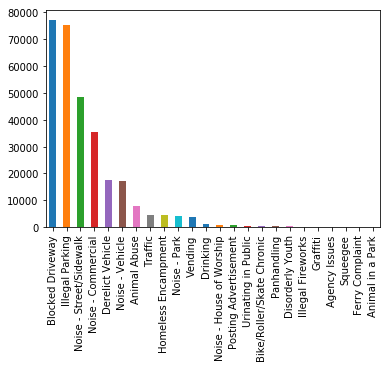

In [0]:
# Most Complaint Type
complaint_details = service['Complaint Type'].value_counts()
#ch_details = ch['Community_Area_Number'].value_counts()
complaint_details.plot(kind='bar')

In [0]:
complaint_details = complaint_details.to_frame().reset_index()
complaint_details

,index,Complaint Type
0,Blocked Driveway,77044
1,Illegal Parking,75361
2,Noise - Street/Sidewalk,48612
3,Noise - Commercial,35577
4,Derelict Vehicle,17718
5,Noise - Vehicle,17083
6,Animal Abuse,7778
7,Traffic,4498
8,Homeless Encampment,4416
9,Noise - Park,4042


In [0]:
complaint_details = complaint_details.rename(columns= {'Complaint Type': 'Number of Cases' })
complaint_details = complaint_details.rename(columns= {'index': 'Complaint Type'})
complaint_details

,Complaint Type,Number of Cases
0,Blocked Driveway,77044
1,Illegal Parking,75361
2,Noise - Street/Sidewalk,48612
3,Noise - Commercial,35577
4,Derelict Vehicle,17718
5,Noise - Vehicle,17083
6,Animal Abuse,7778
7,Traffic,4498
8,Homeless Encampment,4416
9,Noise - Park,4042


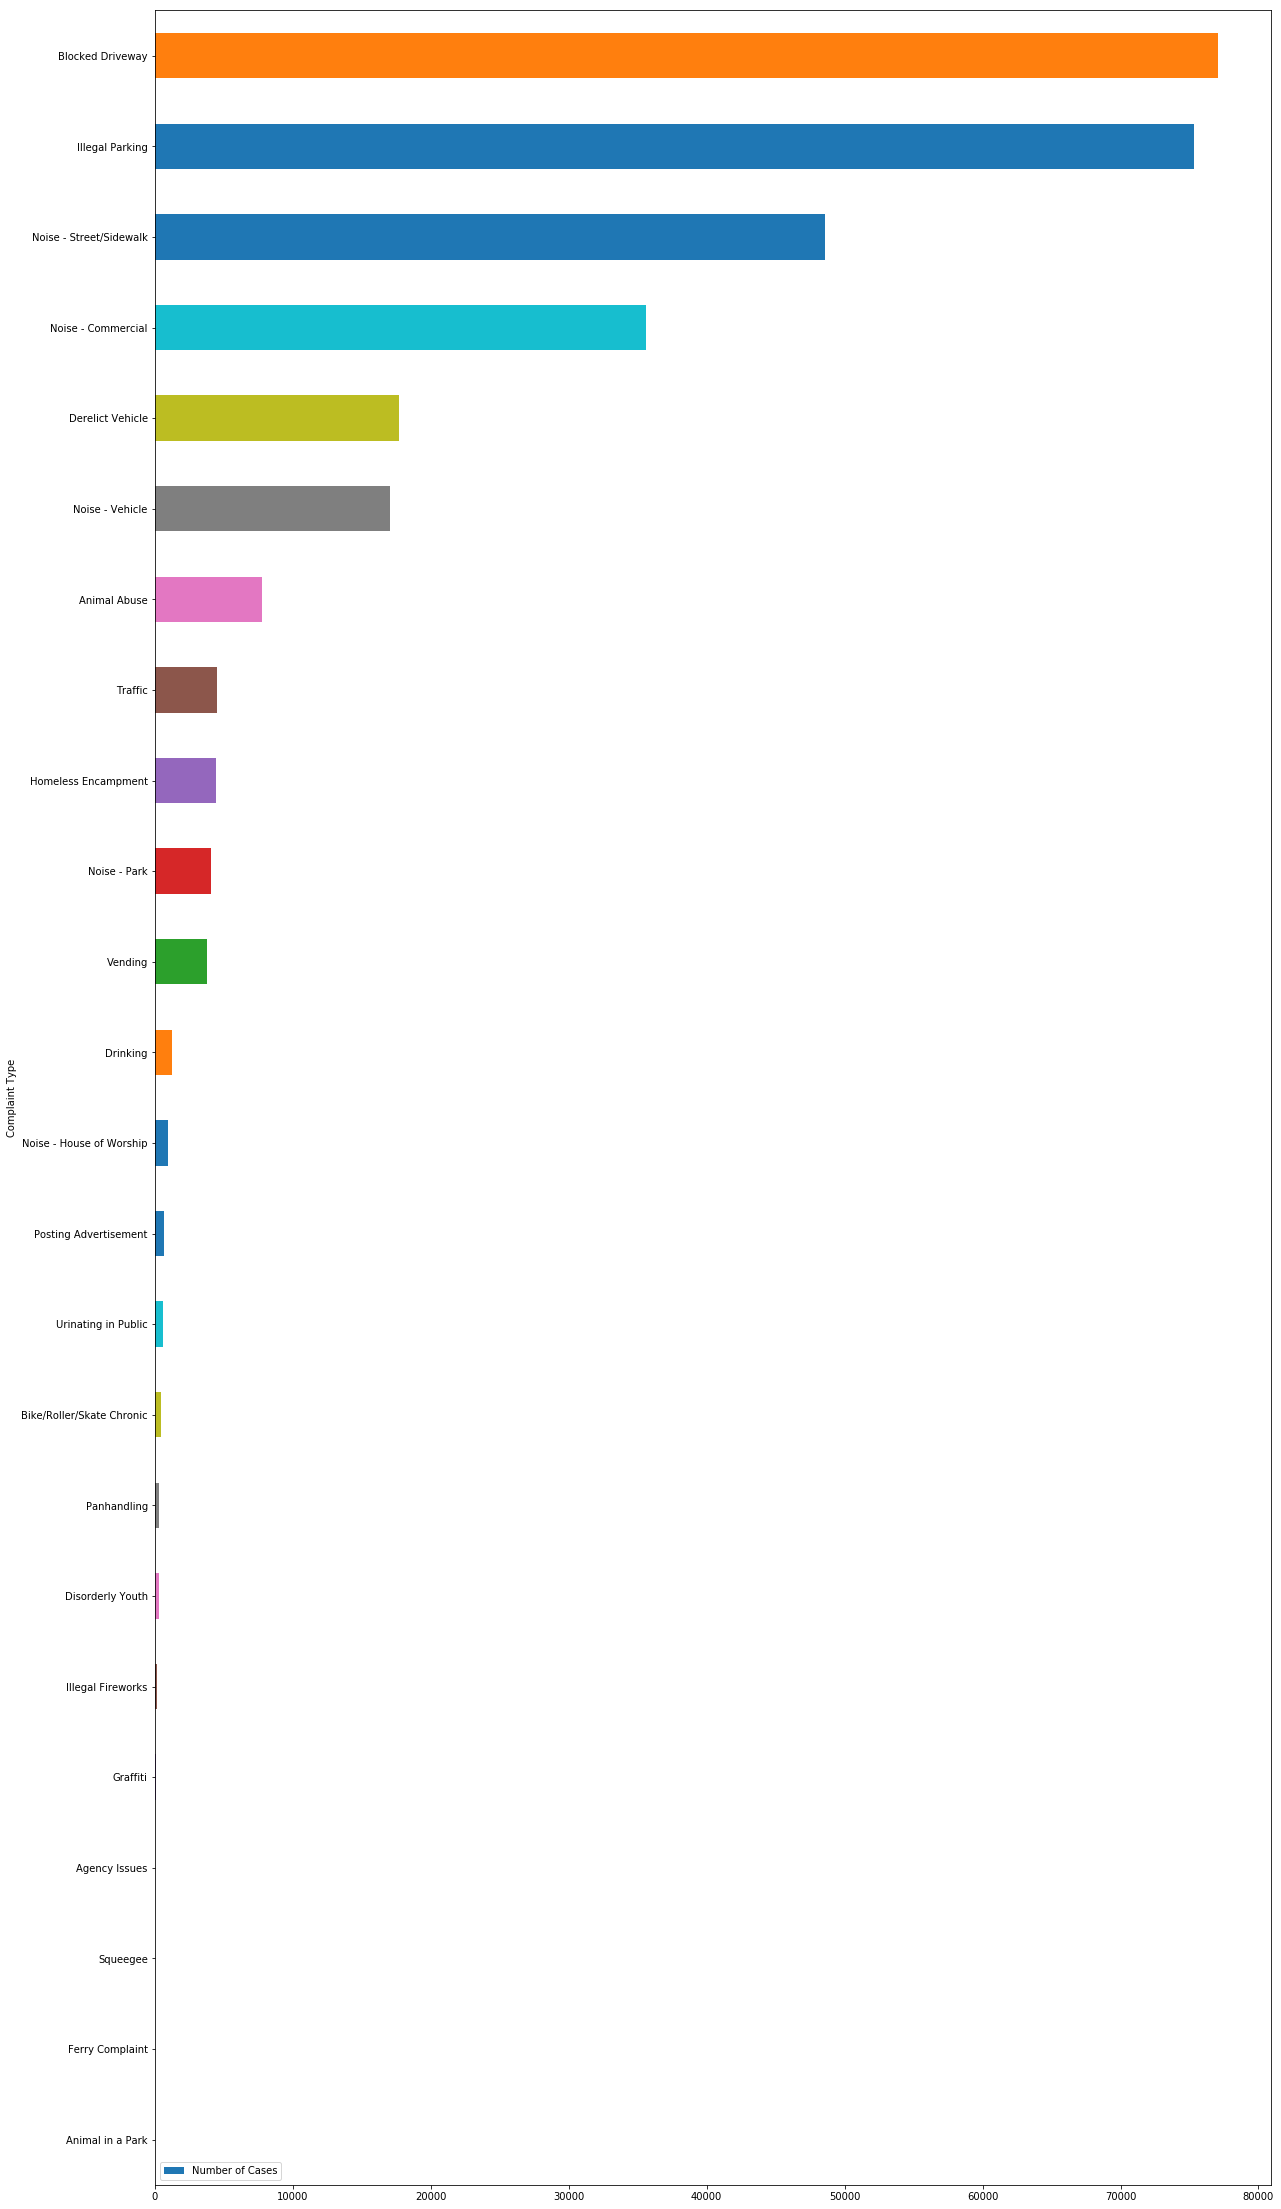

In [0]:
complaint_details = complaint_details.sort_values('Number of Cases')
complaint_details.plot.barh(x='Complaint Type', y='Number of Cases', figsize = (20,40))

## Knowing Number of Complaints in Different Location Types

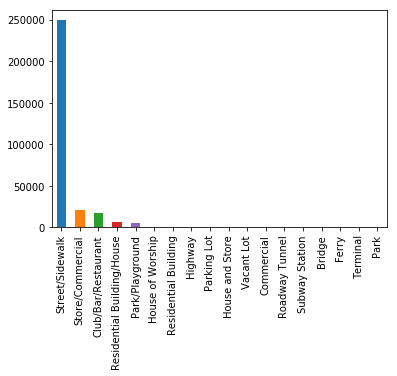

In [0]:
# Most Complaint Type
complaint_details1 = service['Location Type'].value_counts()
#ch_details = ch['Community_Area_Number'].value_counts()
complaint_details1.plot(kind='bar')

In [0]:
complaint_details1 = complaint_details1.to_frame().reset_index()
complaint_details1

,index,Location Type
0,Street/Sidewalk,249299
1,Store/Commercial,20381
2,Club/Bar/Restaurant,17360
3,Residential Building/House,6960
4,Park/Playground,4773
5,House of Worship,929
6,Residential Building,227
7,Highway,215
8,Parking Lot,117
9,House and Store,93


In [0]:
complaint_details1 = complaint_details1.rename(columns= {'Location Type': 'Number of Cases' })
complaint_details1 = complaint_details1.rename(columns= {'index': 'Location Type'})
complaint_details1

,Location Type,Number of Cases
0,Street/Sidewalk,249299
1,Store/Commercial,20381
2,Club/Bar/Restaurant,17360
3,Residential Building/House,6960
4,Park/Playground,4773
5,House of Worship,929
6,Residential Building,227
7,Highway,215
8,Parking Lot,117
9,House and Store,93


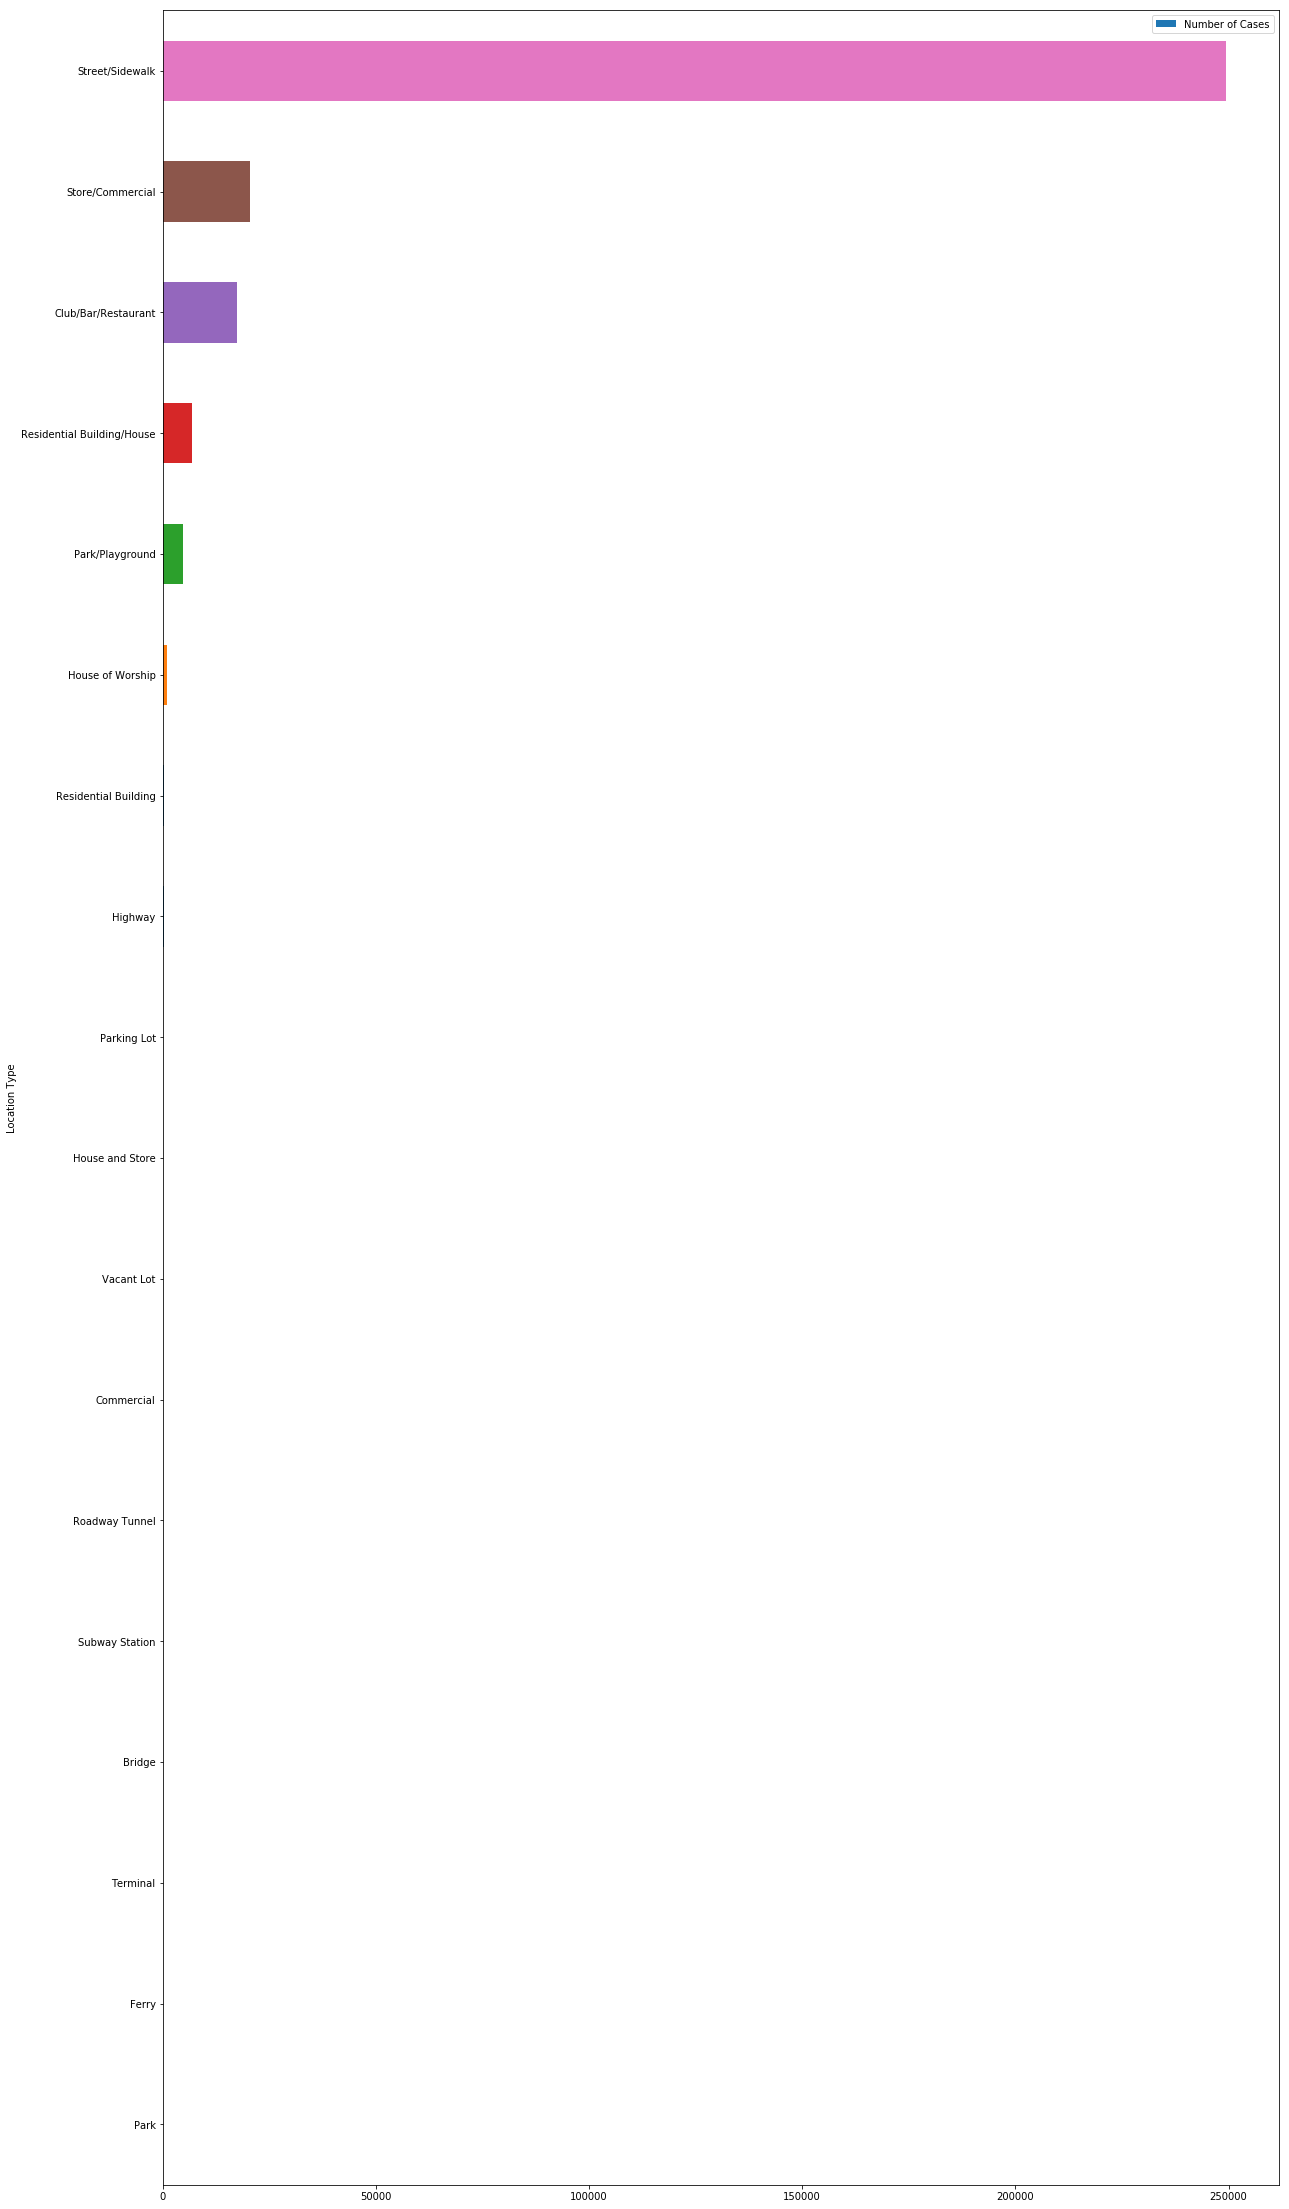

In [0]:
complaint_details1 = complaint_details1.sort_values('Number of Cases')
complaint_details1.plot.barh(x='Location Type', y='Number of Cases', figsize = (20,40))

## Knowing Number of Complaints in Different Cities

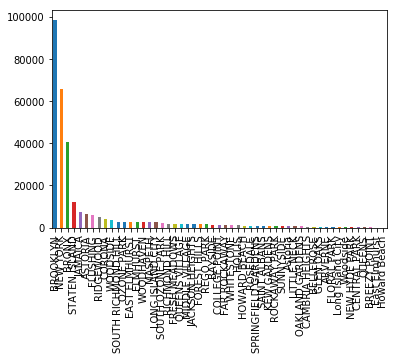

In [0]:
# Number of Complaints in Each City
complaint_details2 = service['City'].value_counts()
#ch_details = ch['Community_Area_Number'].value_counts()
complaint_details2.plot(kind='bar')

In [0]:
complaint_details2 = complaint_details2.to_frame().reset_index()
complaint_details2

,index,City
0,BROOKLYN,98307
1,NEW YORK,65994
2,BRONX,40702
3,STATEN ISLAND,12343
4,JAMAICA,7296
5,ASTORIA,6330
6,FLUSHING,5971
7,RIDGEWOOD,5163
8,CORONA,4295
9,WOODSIDE,3544


In [0]:
complaint_details2 = complaint_details2.rename(columns= {'City': 'Number of Cases' })
complaint_details2 = complaint_details2.rename(columns= {'index': 'City'})
complaint_details2

,City,Number of Cases
0,BROOKLYN,98307
1,NEW YORK,65994
2,BRONX,40702
3,STATEN ISLAND,12343
4,JAMAICA,7296
5,ASTORIA,6330
6,FLUSHING,5971
7,RIDGEWOOD,5163
8,CORONA,4295
9,WOODSIDE,3544


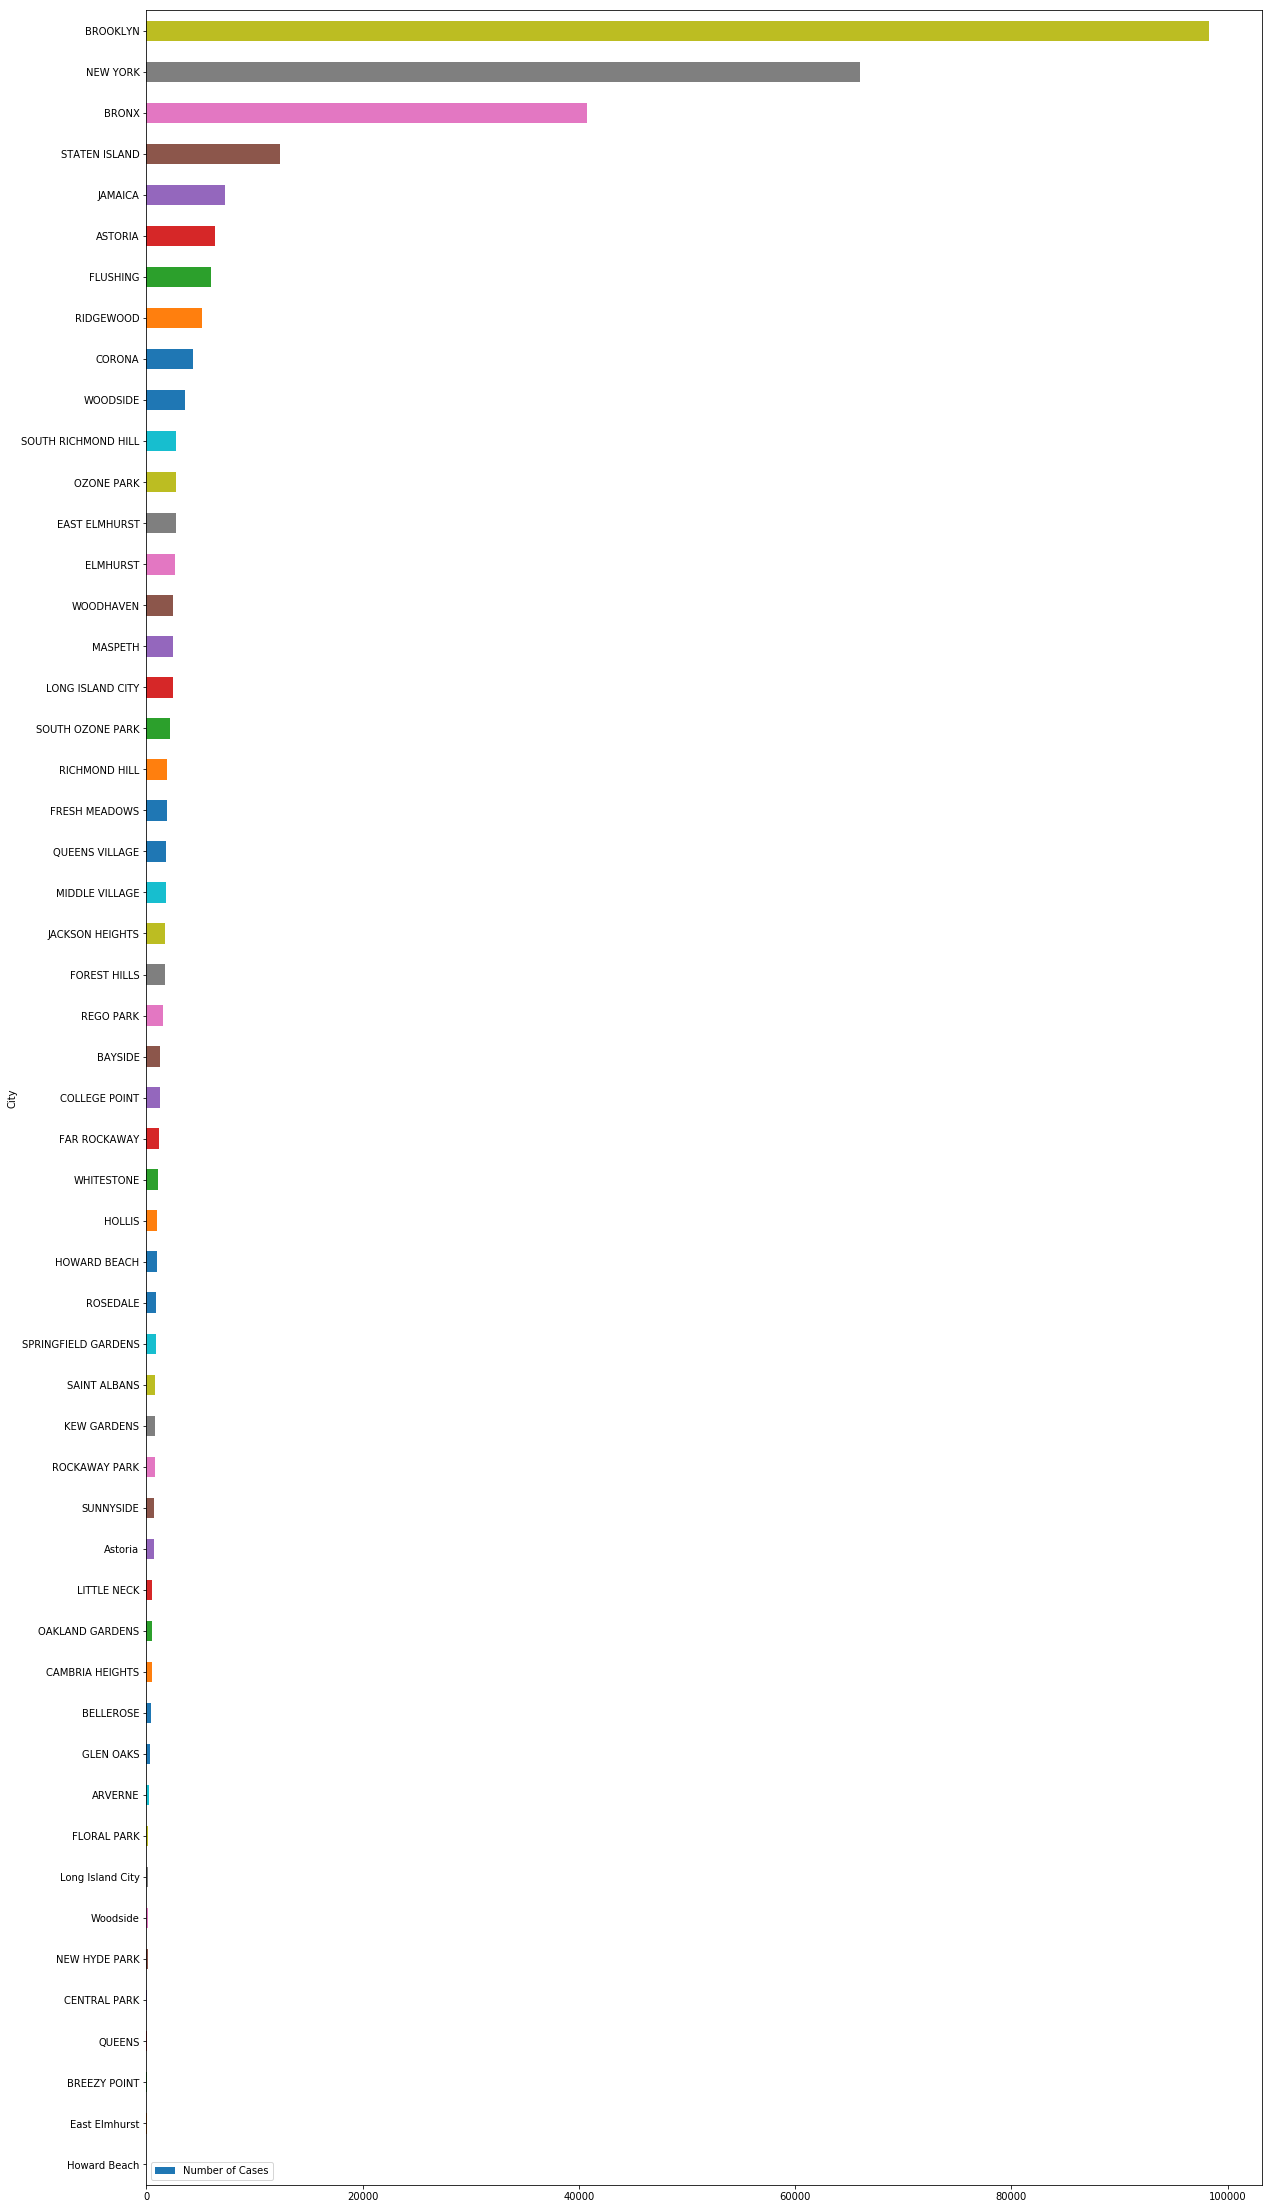

In [0]:
complaint_details2 = complaint_details2.sort_values('Number of Cases')
complaint_details2.plot.barh(x='City', y='Number of Cases', figsize = (20,40))

## Number of Complaints Based on Borough

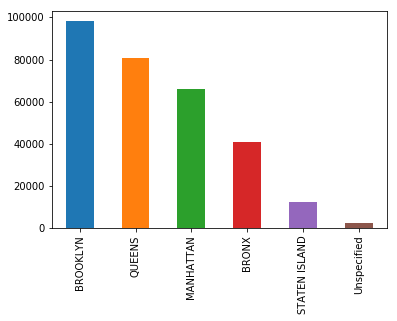

In [0]:
# Number of Complaints in Each Borough
complaint_details3 = service['Borough'].value_counts()
#ch_details = ch['Community_Area_Number'].value_counts()
complaint_details3.plot(kind='bar')

In [0]:
complaint_details3 = complaint_details3.to_frame().reset_index()
complaint_details3

,index,Borough
0,BROOKLYN,98307
1,QUEENS,80641
2,MANHATTAN,66131
3,BRONX,40702
4,STATEN ISLAND,12343
5,Unspecified,2574


In [0]:
complaint_details3 = complaint_details3.rename(columns= {'Borough': 'Number of Cases' })
complaint_details3 = complaint_details3.rename(columns= {'index': 'Borough'})
complaint_details3

,Borough,Number of Cases
0,BROOKLYN,98307
1,QUEENS,80641
2,MANHATTAN,66131
3,BRONX,40702
4,STATEN ISLAND,12343
5,Unspecified,2574


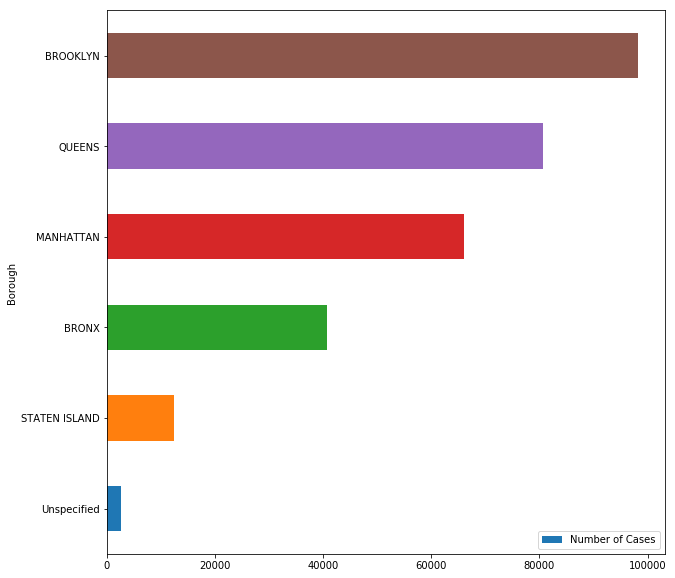

In [0]:
complaint_details3 = complaint_details3.sort_values('Number of Cases')
complaint_details3.plot.barh(x='Borough', y='Number of Cases', figsize = (10,10))

## Ordering the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations

In [0]:
#Converting Request Closing Time into Number of Hours
service['Request_Closing_Time'] = (service['Request_Closing_Time'].dt.seconds/3600) + (service['Request_Closing_Time'].dt.days*24)

In [0]:
grouped = service.groupby(['City', 'Complaint Type'])['Request_Closing_Time'].agg(np.mean)

In [0]:
grouped  

City       Complaint Type           
ARVERNE    Animal Abuse                  2.153626
           Blocked Driveway              2.525968
           Derelict Vehicle              2.968220
           Disorderly Youth              3.591250
           Drinking                      0.238611
           Graffiti                      1.533333
           Homeless Encampment           1.814792
           Illegal Parking               2.316365
           Noise - Commercial            2.287222
           Noise - House of Worship      1.562197
           Noise - Park                  1.283333
           Noise - Street/Sidewalk       1.992395
           Noise - Vehicle               1.859881
           Panhandling                   1.033333
           Urinating in Public           0.691944
           Vending                       0.483333
ASTORIA    Animal Abuse                  5.000169
           Bike/Roller/Skate Chronic     1.739315
           Blocked Driveway              4.816118
           De

In [0]:
grouped = grouped.to_frame().reset_index()

In [0]:
grouped

,City,Complaint Type,Request_Closing_Time
0,ARVERNE,Animal Abuse,2.153626
1,ARVERNE,Blocked Driveway,2.525968
2,ARVERNE,Derelict Vehicle,2.968220
3,ARVERNE,Disorderly Youth,3.591250
4,ARVERNE,Drinking,0.238611
5,ARVERNE,Graffiti,1.533333
6,ARVERNE,Homeless Encampment,1.814792
7,ARVERNE,Illegal Parking,2.316365
8,ARVERNE,Noise - Commercial,2.287222
9,ARVERNE,Noise - House of Worship,1.562197


In [0]:
grouped = grouped.sort_values(['City','Request_Closing_Time'])
#complaint_details3.plot.barh(x='Borough', y='Number of Cases', figsize = (10,10))
grouped

,City,Complaint Type,Request_Closing_Time
4,ARVERNE,Drinking,0.238611
15,ARVERNE,Vending,0.483333
14,ARVERNE,Urinating in Public,0.691944
13,ARVERNE,Panhandling,1.033333
10,ARVERNE,Noise - Park,1.283333
5,ARVERNE,Graffiti,1.533333
9,ARVERNE,Noise - House of Worship,1.562197
6,ARVERNE,Homeless Encampment,1.814792
12,ARVERNE,Noise - Vehicle,1.859881
11,ARVERNE,Noise - Street/Sidewalk,1.992395


In [0]:
#Exporting to Excel - Request Closing Time in Hours - Exporting City-wise Lowest to Highest Request Closing Time in Hours 
#for different Complaints
grouped.to_excel(r'D:\Downloads\7375 Python\Ordered_Data_Output.xlsx')

## Testing whether the average response time across complaint types is similar or not (overall)

Null Hypothsis H0: Average Request Closing Time Across all Complaint Types are Same.
Alternative Hypothesis H1: Average Request Closing Time Across Any Two of the Complaint Types Are Different

We are performing One-Way ANOVA test here.

In [0]:
grouped = grouped.rename(columns= {'Complaint Type': 'Complaint' })
mod = ols(('Request_Closing_Time ~ Complaint'), data=grouped).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)

In [0]:
print (aov_table)

                  sum_sq     df           F  PR(>F)
Complaint  111803.876284   21.0  387.125719     0.0
Residual    10204.446357  742.0         NaN     NaN


#### The One-Way ANOVA test is done and the F-statistic value is 387.12571 and the corresponding p-value is less than 0.01. As the p-value is less than 0.01, we need to reject the null hypothesis with 99% confidence. Hence, we will be concluding that average request closing time across different complaint types are different. 

## Testing whether the type of complaint or service requested and location related?

Here we will be performing Chi-square test to test the independence between location (city) and type of complaint or service. 
Null Hypothesis H0: The two Categorical variables - Type of Complaint and City - are independent.
Alternative Hypothesis H1: The two Categorical variales are dependent.

In [0]:
pd.crosstab(index=service['City'],columns=service['Complaint Type'])

Complaint Type,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,38,0,0,35,27,2,1,1,4,0,...,11,2,29,7,1,0,0,0,1,1
ASTORIA,125,0,15,2618,351,3,35,4,32,4,...,19,61,386,204,1,1,0,47,9,54
Astoria,0,0,0,116,12,0,0,0,0,0,...,0,0,114,0,0,0,0,0,0,0
BAYSIDE,37,0,0,377,198,1,1,3,2,0,...,2,4,15,16,0,0,0,9,0,2
BELLEROSE,7,0,1,95,89,2,1,0,1,1,...,1,1,13,10,1,1,0,7,1,0
BREEZY POINT,2,0,0,3,3,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
BRONX,1415,0,20,12755,1953,63,188,9,247,24,...,79,547,8892,3396,19,17,0,355,51,379
BROOKLYN,2394,0,111,28148,5181,72,257,43,857,61,...,340,1555,13356,5177,49,45,0,1085,136,515
CAMBRIA HEIGHTS,11,0,0,147,115,0,0,0,5,1,...,2,0,25,77,0,0,0,6,0,0


In [0]:
service_crosstab = pd.crosstab(index=service['City'],columns=service['Complaint Type'])

In [0]:
stats.chi2_contingency(service_crosstab)

(119769.34666374496,
 0.0,
 1092,
 array([[5.73241100e+00, 7.38046993e-04, 3.11455831e-01, ...,
         3.31752124e+00, 4.36923820e-01, 2.80088834e+00],
        [1.64937098e+02, 2.12356249e-02, 8.96143369e+00, ...,
         9.54541337e+01, 1.25714899e+01, 8.05891963e+01],
        [1.86824486e+01, 2.40536225e-03, 1.01506287e+00, ...,
         1.08121033e+01, 1.42397445e+00, 9.12834973e+00],
        ...,
        [6.42030032e+01, 8.26612633e-03, 3.48830531e+00, ...,
         3.71562378e+01, 4.89354679e+00, 3.13699494e+01],
        [9.23439299e+01, 1.18892661e-02, 5.01727030e+00, ...,
         5.34422512e+01, 7.03844554e+00, 4.51197649e+01],
        [3.12676964e+00, 4.02571087e-04, 1.69884999e-01, ...,
         1.80955704e+00, 2.38322084e-01, 1.52775728e+00]]))

The Chi-square statistic value here is 119769.35 and p-value is less than 0.01. Hence, with 99% confidence, we can conclude that type of complaint or service requested and location are related.